<div style="border:solid Chocolate 2px; padding: 40px">

<b>Корнел, привет!👋</b>

Меня зовут Евгений Хоран, я буду ревьюером твоего проекта. Ты можешь обращаться ко мне на "ты"😏 Надеюсь, тебя также не смутит, если я буду обращаться к тебе на "ты", но если это неудобно, обязательно скажи об этом!

Если я ошибся с твоим именем, подскажи, пожалуйста!     
    
Пожалуйста, **не удаляй мои комментарии**, они будут особенно полезны для нашей работы в случае повторной проверки проекта. 


Ты также можешь реагировать на мои комментарии своими, выделяя их цветами и наиболее понравившимся тебе способом оформления, но явно  отличающимся от моих комментариев. Это нужно, чтобы не создавалась путаница😉
<div class="alert alert-info" role="alert">
<h2>Комментарий студента<a class="tocSkip"></h2>
    
Например, это можно сделать так    
    </div>    
Ты можешь найти мои комментарии, обозначенные <font color='green'>зеленым</font>, <font color='gold'>желтым</font> и <font color='red'>красным</font> цветами, например:

<br/>


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> В случае, если решение на отдельном шаге является полностью правильным.</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> В случае, когда решение на отдельном шаге станет еще лучше, если внести небольшие коррективы.
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
 В случае, когда решение на отдельном шаге требует существенной переработки и внесения правок. Напоминаю, что проект не может быть принят с первого раза, если ревью содержит комментарии, рекомендующие доработать шаги.
</div>
    
Увидев у тебя неточность, в первый раз я лишь укажу на ее наличие и дам тебе возможность самому найти и исправить ее. На реальной работе твой руководитель будет поступать также, и я пытаюсь подготовить тебя именно к работе аналитиком. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку!🤓

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import datetime as dt
#from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns

# Описание проекта

    Моя задача:

    `Проведу оценку результатов A/B-теста. В моем распоряжении есть датасет с действиями пользователей, техническое задание и несколько вспомогательных датасетов.`
    
    По технической задание, Ожидаемый эффект: за 14 дней с момента регистрации в системе пользователи покажут улучшение каждой метрики не менее, чем на 10%:
    - конверсии в просмотр карточек товаров — событие product_page
    - просмотры корзины — product_cart
    - покупки — purchase.
    
    Оцениваю корректность проведения теста.
    Проанализирую результаты теста.

    Для коректности, проверю:
    пересечение тестовой аудитории с конкурирующим тестом;
    совпадение теста и маркетинговых событий, другие проблемы временных границ теста.
    
    Напишу выводы и рекамендации

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
Здорово, что во вступлении к твоему проекту есть

* задача,

* план проекта

Вступление станет лучше, если ты добавишь в него:

* описание данных,

* заголовок проекта    

Тогда получатель отчета сможет быстрей его понять.


</div>

In [2]:
ab_project_marketing_events = pd.read_csv('/datasets/ab_project_marketing_events.csv')

In [3]:
final_ab_new_users= pd.read_csv('/datasets/final_ab_new_users.csv')

In [4]:
final_ab_events = pd.read_csv('/datasets/final_ab_events.csv')

In [5]:
final_ab_participants = pd.read_csv('/datasets/final_ab_participants.csv')

# 1) Первичное знакомство данных:

In [6]:
display(ab_project_marketing_events.head())

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11


In [7]:
display(final_ab_new_users.head())

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


In [8]:
display(final_ab_events.head())

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


In [9]:
final_ab_events.describe()

,details
count,62740.000000
mean,23.877631
std,72.180465
min,4.990000
25%,4.990000
50%,4.990000
75%,9.990000
max,499.990000


In [10]:
display(final_ab_participants.head())

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,482F14783456D21B,B,recommender_system_test


In [11]:
ab_project_marketing_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes


In [12]:
final_ab_new_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 61732
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     61733 non-null  object
 1   first_date  61733 non-null  object
 2   region      61733 non-null  object
 3   device      61733 non-null  object
dtypes: object(4)
memory usage: 1.9+ MB


In [13]:
final_ab_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440317 entries, 0 to 440316
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     440317 non-null  object 
 1   event_dt    440317 non-null  object 
 2   event_name  440317 non-null  object 
 3   details     62740 non-null   float64
dtypes: float64(1), object(3)
memory usage: 13.4+ MB


    - По табличке `final_ab_events`, средняя стоимость покупки 24 долларов, но можно сказать что есть выбросы так как большинство транзакции в размере 4.99 - 9.99. 
    - Заголовки столбцов в порядке, проведу изменения типов столбцов которые содержут данные с датой.

# 2) Предобработка данных

### Исследоваю тип данных


In [14]:
ab_project_marketing_events['start_dt'] = pd.to_datetime(ab_project_marketing_events['start_dt'], format = '%Y-%m-%d').dt.date 

In [15]:
ab_project_marketing_events['finish_dt'] = pd.to_datetime(ab_project_marketing_events['finish_dt'], format = '%Y-%m-%d').dt.date 

In [16]:
final_ab_events['event_dt'] = pd.to_datetime(final_ab_events['event_dt'],format = '%Y-%m-%d %H:%M:%S').dt.date 

In [17]:
final_ab_new_users['first_date'] = pd.to_datetime(final_ab_new_users['first_date'],format = '%Y-%m-%d').dt.date 

    теперь тип данных в порядке. Следуйщий шаг проверю данные на дубликаты и пропусков.
   

### Исследоваю пропущенные значения

In [18]:
ab_project_marketing_events.isna().sum()

name         0
regions      0
start_dt     0
finish_dt    0
dtype: int64

In [19]:
final_ab_new_users.isna().sum()

user_id       0
first_date    0
region        0
device        0
dtype: int64

In [20]:
final_ab_events.isna().sum()

user_id            0
event_dt           0
event_name         0
details       377577
dtype: int64

In [21]:
final_ab_participants.isna().sum()

user_id    0
group      0
ab_test    0
dtype: int64

In [22]:
final_ab_events[final_ab_events['details'].isna()]

,user_id,event_dt,event_name,details
62740,2E1BF1D4C37EA01F,2020-12-07,product_cart,NaN
62741,50734A22C0C63768,2020-12-07,product_cart,NaN
62742,5EB159DA9DC94DBA,2020-12-07,product_cart,NaN
62743,084A22B980BA8169,2020-12-07,product_cart,NaN
62744,0FC21E6F8FAA8DEC,2020-12-07,product_cart,NaN
...,...,...,...,...
440312,245E85F65C358E08,2020-12-30,login,NaN
440313,9385A108F5A0A7A7,2020-12-30,login,NaN
440314,DB650B7559AC6EAC,2020-12-30,login,NaN
440315,F80C9BDDEA02E53C,2020-12-30,login,NaN


In [23]:
len(final_ab_events[final_ab_events['details'].isna()])/len(final_ab_events)

0.8575117472184812

In [24]:
final_ab_events['event_name'].value_counts().reset_index()

,index,event_name
0,login,189552
1,product_page,125563
2,purchase,62740
3,product_cart,62462


In [25]:
final_ab_events[final_ab_events['details'].isna()].groupby('event_name').count()[['user_id']].reset_index()

,event_name,user_id
0,login,189552
1,product_cart,62462
2,product_page,125563


    мы видим что столбец по событиях "purchase" столбец "user_id" не содержит NaN values и это логично: все пользователи  которые делали покупки оплатили денег и мы видим суммы в столбец "purchase", для всех остольных данных поставим коммент "no_purchase" или "0" и потом для анализа столбца  можем использовать фильтр, так как нет похожих данных. видно это на гистограмы при заполненмя пропущенных данных в табличке final_ab_test_table.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
<b>Все отлично!👍:</b> 
    
Применены все основные инструменты предобработки данных    

### Поменяю пропущенные значения "NaN" на 0 для колонки "details":

In [26]:
final_ab_events = final_ab_events.fillna(0)

### Исследоваю дубликаты по датасету

In [27]:
ab_project_marketing_events[ab_project_marketing_events.duplicated()]

,name,regions,start_dt,finish_dt


In [28]:
final_ab_new_users[final_ab_new_users.duplicated()]

,user_id,first_date,region,device


In [29]:
final_ab_events[final_ab_events.duplicated()]

,user_id,event_dt,event_name,details
41759,72C55C38CAE0B00B,2020-12-21,purchase,4.99
377026,72C55C38CAE0B00B,2020-12-21,login,0.00


In [30]:
final_ab_events =final_ab_events.drop_duplicates()

In [31]:
final_ab_participants[final_ab_participants.duplicated()]

,user_id,group,ab_test


    нашел дубликатов в табличке "final_ab_events" и удалил. остольные проверил, все хрошо.

# Оцените корректность проведения теста. 

   **Техническое задание**
   
- Название теста: recommender_system_test;
- Группы: А (контрольная), B (новая платёжная воронка);
- Дата запуска: 2020-12-07;
- Дата остановки набора новых пользователей: 2020-12-21;
- Дата остановки: 2021-01-04;
- Аудитория: 15% новых пользователей из региона EU;
- Назначение теста: тестирование изменений, связанных с внедрением улучшенной рекомендательной системы;
- Ожидаемое количество участников теста: 6000.
- Ожидаемый эффект: за 14 дней с момента регистрации в системе пользователи покажут улучшение каждой метрики не менее, чем на 10%:
- конверсии в просмотр карточек товаров — событие product_page
- просмотры корзины — product_cart
- покупки — purchase.

### Соответствие данных требованиям технического задания. Проверьте корректность всех пунктов технического задания.

    Для начало, чтобы проверить все пункты по технмчмской задачи, нужно будет обьеденить несколько табличек вместе.

In [32]:
ab_participants_new_users = final_ab_participants.merge(final_ab_new_users,on = 'user_id', how = 'left')

In [33]:
final_ab_test_table = ab_participants_new_users.merge(final_ab_events,on = 'user_id', how = 'left')

In [34]:
final_ab_test_table

,user_id,group,ab_test,first_date,region,device,event_dt,event_name,details
0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07,purchase,99.99
1,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-25,purchase,4.99
2,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07,product_cart,0.00
3,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-25,product_cart,0.00
4,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07,product_page,0.00
...,...,...,...,...,...,...,...,...,...
110363,63FBE257B05F2245,A,interface_eu_test,2020-12-20,EU,Android,2020-12-23,login,0.00
110364,79F9ABFB029CF724,B,interface_eu_test,2020-12-14,EU,PC,2020-12-14,login,0.00
110365,79F9ABFB029CF724,B,interface_eu_test,2020-12-14,EU,PC,2020-12-15,login,0.00
110366,79F9ABFB029CF724,B,interface_eu_test,2020-12-14,EU,PC,2020-12-16,login,0.00


    проверяю что количество участников в табличке "final_ab_test_table" и табличке "final_ab_participants" одинаковое 

In [35]:
final_ab_test_table[final_ab_test_table['ab_test'] == 'recommender_system_test'].groupby('group').agg({'user_id':'nunique'})

,user_id
group,
A,3824
B,2877


    распределения участников по группам A/B отличается большце чем на 1 %, то что значемый фактор для проведения A/B тестя

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Некоторые замечания и рекомендации💡:</b> 
    
Будет здорово, если ты перефразируешь свою мысль. Сейчас мне не очень понятно о чем ты хотел сказать    
    
    то что значемый фактор для проведения A/B тестя    
    
Есть отличная статья по поводу различий в размере выборок    
    
https://medium.com/statistics-experiments/дисбаланс-в-a-b-тестах-есть-ли-разница-между-99-1-и-50-50-в-экспериментах-11c8f4fe7eb4    

    проверяю если появились пропущенные значения:

In [36]:
final_ab_test_table.isna().sum()

user_id          0
group            0
ab_test          0
first_date       0
region           0
device           0
event_dt      3743
event_name    3743
details       3743
dtype: int64

In [37]:
final_ab_test_table[final_ab_test_table['event_dt'].isna()]

,user_id,group,ab_test,first_date,region,device,event_dt,event_name,details
32,482F14783456D21B,B,recommender_system_test,2020-12-14,EU,PC,NaN,NaN,NaN
59,057AB296296C7FC0,B,recommender_system_test,2020-12-17,EU,iPhone,NaN,NaN,NaN
66,E9FA12FAE3F5769C,B,recommender_system_test,2020-12-14,EU,Android,NaN,NaN,NaN
67,FDD0A1016549D707,A,recommender_system_test,2020-12-13,EU,PC,NaN,NaN,NaN
68,547E99A7BDB0FCE9,A,recommender_system_test,2020-12-12,EU,iPhone,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
109807,54C70FDA087B74AC,A,interface_eu_test,2020-12-12,EU,PC,NaN,NaN,NaN
109842,50509A01096B2B14,A,interface_eu_test,2020-12-12,EU,iPhone,NaN,NaN,NaN
110203,2B0CD24EE4291CA0,B,interface_eu_test,2020-12-14,EU,Android,NaN,NaN,NaN
110306,C70DF942E542DA69,A,interface_eu_test,2020-12-08,EU,iPhone,NaN,NaN,NaN


    Мы видим что по часть участников A/B теста нет информации по событиям новых пользователей в период с 7 декабря 2020 по 4 января 2021 года. Я не хочу удалять эти данные чтобы сохранять изначальные пропорцию количество участников и соберать  по ним максимальную информацию соеденив таблицы. 

    следавательно, я заполню табоичку "no_info" в столбцах "event_name" и 'event_dt' а в столбце details заполняю "0" чтобы сохранить тип данных float64 ине повторить значения.

In [38]:
#final_ab_events = final_ab_events.fillna('no_purchase')

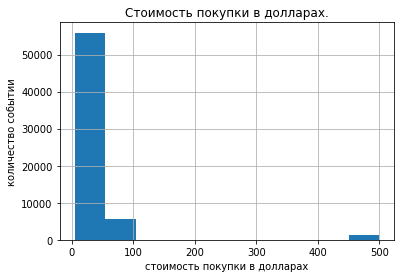

In [39]:
final_ab_events[final_ab_events['details']!=0]['details'].hist()
plt.xlabel('стоимость покупки в долларах')
plt.ylabel('количество событии')
plt.title('Стоимость покупки в долларах.')
plt.show()

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

<b>На доработку🤔:</b>
    
* Графики надо доработать. Стоит добавить названия графиков. Для этого у нас есть:
    
`plt.title('name')` 
    
`plt.xlabel('name')`
    
`plt.ylabel('name')`

Прикреплю ссылки на официальный сайт
 
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylabel.html
    
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html
    
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html
    
    
Чтобы повернуть подписи на оси нужно использовать `plt.xticks(rotation=45)`
    
Прикреплю ссылку с примером
    
https://matplotlib.org/stable/gallery/subplots_axes_and_figures/secondary_axis.html#sphx-glr-gallery-subplots-axes-and-figures-secondary-axis-py        
    

<div class="alert alert-info"> <b>Комментарий студента:</b> 

спасибо! понял, поменял:
    
добавил:
- plt.xlabel('стоимость покупки в долларах')
- plt.ylabel('количество событии')
- plt.title('Стоимость покупки в долларах.')
- plt.show()

 </div>


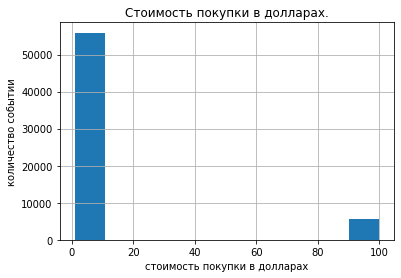

In [40]:
final_ab_events[final_ab_events['details']!=0]['details'].hist(bins = 10, range= (1,100))
plt.xlabel('стоимость покупки в долларах')
plt.ylabel('количество событии')
plt.title('Стоимость покупки в долларах.')
plt.show()

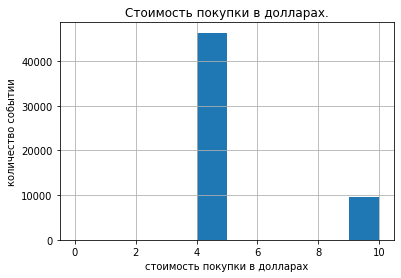

In [41]:
final_ab_events[final_ab_events['details']!=0]['details'].hist(bins = 10, range= (0,10))
plt.xlabel('стоимость покупки в долларах')
plt.ylabel('количество событии')
plt.title('Стоимость покупки в долларах.')
plt.show()

    перваначальные выводы подверждаются что у большинтсво клиентов стоимость покупки 5 долларов 4500+ клиентов. Остольные клиенты покупают за 10 и 100 долларов, количество таких клиентов меньше 1000 по каждой группе - такие данные можем считать выбросами.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

<b>На доработку🤔:</b>
    
Сейчас на графиках невозможно определить то, о чем ты говоришь 
    
    перваначальные выводы подверждаются что у большинтсво клиентов стоимость покупки 5 долларов 4500+ клиентов. Остольные клиенты покупают за 10 и 100 долларов, количество таких клиентов меньше 1000 по каждой группе - такие данные можем считать выбросами.
    
Сейчас мы можем говорить о количестве событий, но не о количестве пользователей совершивших события. Стоит пересмотреть вывод или график

<div class="alert alert-info"> <b>Комментарий студента:</b> 

спасибо! согласен:

    
"    4500+ события стоимость покупки 5 долларов. Остольные события состовляют 10 и 100 долларов, таких события чем меньше 2000.
    "
    

 </div>


<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <font color= "black"> V2</font><a class="tocSkip"></h2>

<b>На доработку🤔:</b>
    
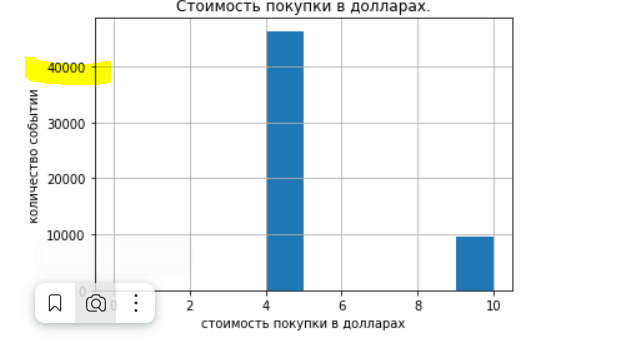
    
На графике не 4500. Стоит доработать наблюдение    

<div class="alert alert-info"> <b>Комментарий студента V2:</b> 

спасибо! так точно ! вместо 4500 я наблюдаю 45 000 количество события, и вместо 2000 я наблюдаю 20 000 события
    
    " 45 000+ события стоимость покупки 5 долларов. Остольные события состовляют 10 и 100 долларов, таких события чем меньше 20 000. "

 </div>

<div class="alert alert-success">
<h2> Комментарий ревьюера <font color= "black"> V3</font> <a class="tocSkip"> </h2>
<b>Все отлично!👍 :</b> 
   
Верные наблюдения   

In [42]:
final_ab_test_table['event_dt'] = final_ab_test_table['event_dt'].fillna('no_info')

In [43]:
final_ab_test_table['event_name'] = final_ab_test_table['event_name'].fillna('no_info')

In [44]:
final_ab_test_table['details'] = final_ab_test_table['details'].fillna(0)

In [45]:
final_ab_test_table

,user_id,group,ab_test,first_date,region,device,event_dt,event_name,details
0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07,purchase,99.99
1,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-25,purchase,4.99
2,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07,product_cart,0.00
3,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-25,product_cart,0.00
4,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07,product_page,0.00
...,...,...,...,...,...,...,...,...,...
110363,63FBE257B05F2245,A,interface_eu_test,2020-12-20,EU,Android,2020-12-23,login,0.00
110364,79F9ABFB029CF724,B,interface_eu_test,2020-12-14,EU,PC,2020-12-14,login,0.00
110365,79F9ABFB029CF724,B,interface_eu_test,2020-12-14,EU,PC,2020-12-15,login,0.00
110366,79F9ABFB029CF724,B,interface_eu_test,2020-12-14,EU,PC,2020-12-16,login,0.00


In [46]:
final_ab_test_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110368 entries, 0 to 110367
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     110368 non-null  object 
 1   group       110368 non-null  object 
 2   ab_test     110368 non-null  object 
 3   first_date  110368 non-null  object 
 4   region      110368 non-null  object 
 5   device      110368 non-null  object 
 6   event_dt    110368 non-null  object 
 7   event_name  110368 non-null  object 
 8   details     110368 non-null  float64
dtypes: float64(1), object(8)
memory usage: 8.4+ MB


    проверяю если в новой табличке нету дубликатов

In [47]:
final_ab_test_table[final_ab_test_table.duplicated()]

,user_id,group,ab_test,first_date,region,device,event_dt,event_name,details


    С такой полноценной табличке "final_ab_test_table", теперь можно проверять все критерии технического теста

#### Название теста: recommender_system_test;

In [48]:
recommender_system_test_table = final_ab_test_table[final_ab_test_table['ab_test'] == 'recommender_system_test']

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Верное решение выделить целевой тест

In [49]:
recommender_system_test_table

,user_id,group,ab_test,first_date,region,device,event_dt,event_name,details
0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07,purchase,99.99
1,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-25,purchase,4.99
2,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07,product_cart,0.00
3,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-25,product_cart,0.00
4,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07,product_page,0.00
...,...,...,...,...,...,...,...,...,...
27719,6715343AFBA285AE,B,recommender_system_test,2020-12-07,CIS,Android,2020-12-07,login,0.00
27720,6715343AFBA285AE,B,recommender_system_test,2020-12-07,CIS,Android,2020-12-08,login,0.00
27721,6715343AFBA285AE,B,recommender_system_test,2020-12-07,CIS,Android,2020-12-09,login,0.00
27722,6715343AFBA285AE,B,recommender_system_test,2020-12-07,CIS,Android,2020-12-10,login,0.00


In [50]:
recommender_system_test_table.groupby('group').agg({'user_id':'nunique'})

,user_id
group,
A,3824
B,2877


    распределения участников по группам A/B отличается большце чем на 1 %, то что значемый фактор для проведения A/B тестя

In [51]:
# проверяю на дубликаты
recommender_system_test_table[['user_id','group','event_name','event_dt']].duplicated().sum()

0

#### Группы: А (контрольная), B (новая платёжная воронка);

In [52]:
recommender_system_test_table[['group','event_name']].drop_duplicates().reset_index().drop('index', axis = 1).set_index('group')

,event_name
group,
A,purchase
A,product_cart
A,product_page
A,login
B,no_info
A,no_info
B,product_page
B,login
B,purchase


    мы видим что все карточки распределены по А/B категории, не только 'purchase - event_name', для платёжной воронке.

#### Дата запуска: 2020-12-07;

In [53]:
recommender_system_test_table[recommender_system_test_table['event_dt'] !='no_info']['first_date'].min()

datetime.date(2020, 12, 7)

#### Дата остановки набора новых пользователей: 2020-12-21;

In [54]:
recommender_system_test_table['first_date'].max()

datetime.date(2020, 12, 21)

#### Дата остановки: 2021-01-04;

In [55]:
recommender_system_test_table[recommender_system_test_table['event_dt'] !='no_info']['first_date'].max()

datetime.date(2020, 12, 21)

    Последние данные доступны для теста по карточкам 30.12.2020, даже если в задачи написанно что табличка "final_ab_events" содержит данные  все события новых пользователей в период с 7 декабря 2020 по 4 января 2021 года.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

<b>На доработку🤔:</b>
    
В анализе нет информации о дате `30.12.2020`. 
    
Пожалуйста, пересмотри свой вывод или анализ    

<div class="alert alert-info"> <b>Комментарий студента:</b> 

спасибо! делаю ниже:


 </div>

In [56]:
final_ab_events['event_dt'].max()

datetime.date(2020, 12, 30)

<div class="alert alert-success">
<h2> Комментарий ревьюера <font color= "black"> V2</font> <a class="tocSkip"> </h2>
<b>Все отлично!👍 :</b> 
    
Верно    

#### Аудитория: 15% новых пользователей из региона EU;

In [57]:
recommender_system_test_table[recommender_system_test_table['region']=='EU']['user_id'].nunique()

6351

In [58]:
final_ab_new_users[final_ab_new_users['region'] == 'EU']['user_id'].nunique()

46270

In [59]:
recommender_system_test_table[recommender_system_test_table['region']=='EU']['user_id'].nunique() / final_ab_new_users[final_ab_new_users['region'] == 'EU']['user_id'].nunique()

0.13725956343202939

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Некоторые замечания и рекомендации💡:</b> 
    
Стоит добавить округление    

    Из всех пользователей табличке "final_ab_new_users"  из региона "EU" - 46270 пользователей, попали в финальный тест табличке A/B тест только 13.7%.

    Тагже в A/B тест участвуют уникальных пользователей из других стран, их распределения по странам ниже:

In [60]:
recommender_system_test_table.groupby('region').agg({'user_id':'nunique'}).reset_index().set_index('region')

,user_id
region,
APAC,72
CIS,55
EU,6351
N.America,223


    участники из региона UЕ гораздо больше.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
    
И это правильно. Если вспомнить описание проекта, то станет понятно, что эксперимент нацелен на пользователей региона EU

#### Назначение теста: тестирование изменений, связанных с внедрением улучшенной рекомендательной системы;

    Изменения связанных с внедрением улучшенной рекомендательной системы можно посмотреть по двум групам сравня кумулятивные данные по каличество визитов и выручки в течения периода тестирования. 
    по этим двумя пунктами я отвечю после исследовательского анализа, когда буду как меняется конверсия

#### Ожидаемое количество участников теста: 6000.

In [61]:
len(recommender_system_test_table['user_id'].unique())

6701

Ожидаемое количество участников теста: 6351, чуть больше чем ожидаемое 6000.

#### Ожидаемый эффект: за 14 дней с момента регистрации в системе пользователи покажут улучшение каждой метрики не менее, чем на 10%:
- конверсии в просмотр карточек товаров — событие product_page
- просмотры корзины — product_cart
- покупки — purchase.

    Эту заданию я детально проанализирую и опишу в раздел исследовательский анализ данных, пока посмортю только на общую картину/ общий тренд.

In [62]:
recommender_system_test_table = recommender_system_test_table.rename(columns = {'first_date':'date'})

In [63]:
recommender_system_test_table

,user_id,group,ab_test,date,region,device,event_dt,event_name,details
0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07,purchase,99.99
1,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-25,purchase,4.99
2,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07,product_cart,0.00
3,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-25,product_cart,0.00
4,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07,product_page,0.00
...,...,...,...,...,...,...,...,...,...
27719,6715343AFBA285AE,B,recommender_system_test,2020-12-07,CIS,Android,2020-12-07,login,0.00
27720,6715343AFBA285AE,B,recommender_system_test,2020-12-07,CIS,Android,2020-12-08,login,0.00
27721,6715343AFBA285AE,B,recommender_system_test,2020-12-07,CIS,Android,2020-12-09,login,0.00
27722,6715343AFBA285AE,B,recommender_system_test,2020-12-07,CIS,Android,2020-12-10,login,0.00


In [64]:
#Аудитория: 15% новых пользователей из региона EU
recommender_system_test_table = recommender_system_test_table[recommender_system_test_table['region'] == 'EU']

In [65]:
conversion_table_events = recommender_system_test_table.pivot_table(index = 'date', 
                                                                    columns = 'event_name',
                                                                    values = 'user_id',
                                                                   aggfunc = 'count').drop('no_info',axis =1)

In [66]:
# общая табличка по конверсии события / карточек воронки
conversion_table_events

event_name,login,product_cart,product_page,purchase
date,,,,
2020-12-07,1051,278,667,336
2020-12-08,426,106,258,91
2020-12-09,515,148,293,122
2020-12-10,248,52,106,58
2020-12-11,311,93,160,46
2020-12-12,314,60,154,61
2020-12-13,168,19,80,22
2020-12-14,1466,442,930,449
2020-12-15,748,270,467,246


In [67]:
conversion_table_events['cr %, product_page'] = np.ceil(conversion_table_events['product_page'] / conversion_table_events['login'] *100)

In [68]:
conversion_table_events['cr %, product_cart'] = np.ceil(conversion_table_events['product_cart'] / conversion_table_events['product_page'] *100)

In [69]:
conversion_table_events['cr %, purchase'] = np.ceil(conversion_table_events['purchase'] / conversion_table_events['product_cart'] *100)

In [70]:
conversion_table_events

event_name,login,product_cart,product_page,purchase,"cr %, product_page","cr %, product_cart","cr %, purchase"
date,,,,,,,
2020-12-07,1051,278,667,336,64.0,42.0,121.0
2020-12-08,426,106,258,91,61.0,42.0,86.0
2020-12-09,515,148,293,122,57.0,51.0,83.0
2020-12-10,248,52,106,58,43.0,50.0,112.0
2020-12-11,311,93,160,46,52.0,59.0,50.0
2020-12-12,314,60,154,61,50.0,39.0,102.0
2020-12-13,168,19,80,22,48.0,24.0,116.0
2020-12-14,1466,442,930,449,64.0,48.0,102.0
2020-12-15,748,270,467,246,63.0,58.0,92.0


<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

<b>На доработку🤔:</b>
    
Стоит пересмотреть порядок столбцов, чтобы не путать коллег    

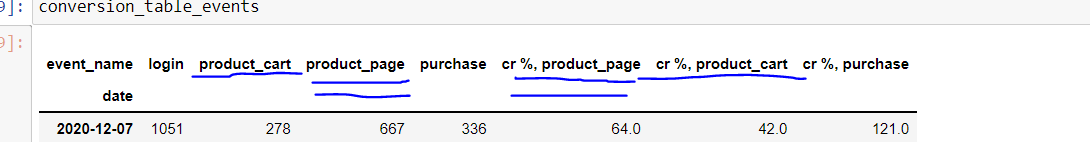
    
Конверсия в части наблюдений выше 100%. По определению это невозможно. Пожалуйста, добавь свое наблюдение, почему так могло произойти     

<div class="alert alert-info"> <b>Комментарий студента:</b> 

спасибо! понял! делаю ниже через "df.reindex" + 

добовляю коментарии по поводу "Конверсии выше 100%": это может быть тот случае когда участник пропускает одно события в воронке и переход сразу на следующее событие. В нашем случае, некоторые участники переходят с карточек товаров на карточки покупки, без просмотра корзины. Значит просмотр корзины необязательный шаг чтобы совершить оплату.

 </div>

<div class="alert alert-success">
<h2> Комментарий ревьюера <font color= "black"> V2</font> <a class="tocSkip"> </h2>
<b>Все отлично!👍 :</b> 
    
Верное наблюдение

In [71]:
conversion_table_events.columns

Index(['login', 'product_cart', 'product_page', 'purchase',
       'cr %, product_page', 'cr %, product_cart', 'cr %, purchase'],
      dtype='object', name='event_name')

In [72]:
conversion_table_events = conversion_table_events.reindex(columns=['login','product_page','product_cart','purchase','cr %, product_page', 'cr %, product_cart', 'cr %, purchase'])

In [73]:
conversion_table_events

event_name,login,product_page,product_cart,purchase,"cr %, product_page","cr %, product_cart","cr %, purchase"
date,,,,,,,
2020-12-07,1051,667,278,336,64.0,42.0,121.0
2020-12-08,426,258,106,91,61.0,42.0,86.0
2020-12-09,515,293,148,122,57.0,51.0,83.0
2020-12-10,248,106,52,58,43.0,50.0,112.0
2020-12-11,311,160,93,46,52.0,59.0,50.0
2020-12-12,314,154,60,61,50.0,39.0,102.0
2020-12-13,168,80,19,22,48.0,24.0,116.0
2020-12-14,1466,930,442,449,64.0,48.0,102.0
2020-12-15,748,467,270,246,63.0,58.0,92.0


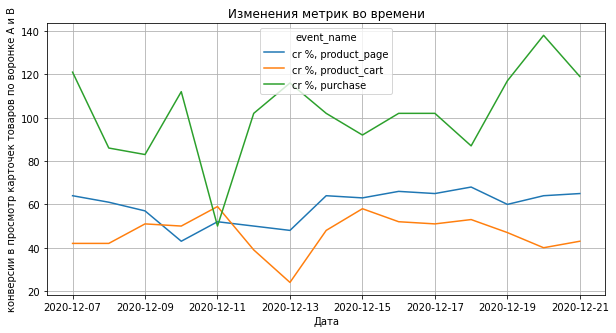

In [74]:
# Общая выборка участников группы 
conversion_table_events.drop(['login','product_cart','product_page','purchase'],axis = 1).plot(grid=True, figsize=(10, 5))
plt.ylabel('конверсии в просмотр карточек товаров по воронке A и B')
plt.xlabel('Дата')
plt.title('Изменения метрик во времени')
plt.show()

    по Общему датасету и не разделя по выборкам, Я не наблюдаем улучшение каждой метрики не менее, чем на 10%

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

<b>На доработку🤔:</b>
    
Чтобы у нас появилась возможность оценить изменение между группами стоит проводить анализ в разбивке по группам.
    
Сейчас ты проводишь анализ по объедененным наблюдениям

<div class="alert alert-info"> <b>Комментарий студента:</b> 

`#старый коментарии и ненужный.`
    
я вас понял, я проводио анадиз по выборкам ниже в этом проекте, в исследовательский анализ данных. копирою график и комментарии ниже.
    
 </div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <font color= "black"> V2</font><a class="tocSkip"></h2>

<b>На доработку🤔:</b>
    
Наблюдение стоит заменить    
    
    по Общему датасету и не разделя по выборкам, Я не наблюдаем улучшение каждой метрики не менее, чем на 10%
    
Данный график помогает проанализировать динамику метрик, но не помогает сравнить метрики между группами

<div class="alert alert-info"> <b>Комментарий студента V2:</b> 

спасибо! вы меня не поняли последний раз.
    
- во первых я с вами согласен (график выше+ коментарии старые и ненужные)
- во вторых, я разделяю датасет на group_A и group_B и сравниваю метрики ниже (следующие 20 линии). посмотртите пожалуйста графики ниже и коментарии к ним. 
    

Спасибо!

 </div>

<div class="alert alert-success">
<h2> Комментарий ревьюера <font color= "black"> V3</font> <a class="tocSkip"> </h2>
<b>Все отлично!👍 :</b> 
   
Теперь понятно, спасибо за разъяснение
    

In [75]:
group_A = recommender_system_test_table[recommender_system_test_table['group'] == 'A']

In [76]:
group_B = recommender_system_test_table[recommender_system_test_table['group'] == 'B']

In [77]:
conversion_table_events_A = group_A.pivot_table(index = 'date', 
                                                                    columns = 'event_name',
                                                                    values = 'user_id',
                                                                   aggfunc = 'count').drop('no_info',axis =1)

In [78]:
conversion_table_events_B = group_B.pivot_table(index = 'date', 
                                                                    columns = 'event_name',
                                                                    values = 'user_id',
                                                                   aggfunc = 'count').drop('no_info',axis =1)

In [79]:
conversion_table_events_A['cr %, product_page'] = np.ceil(conversion_table_events_A['product_page'] / conversion_table_events_A['login'] *100)

In [80]:
conversion_table_events_A['cr %, product_cart'] = np.ceil(conversion_table_events_A['product_cart'] / conversion_table_events_A['product_page'] *100)

In [81]:
conversion_table_events_A['cr %, purchase'] = np.ceil(conversion_table_events_A['purchase'] / conversion_table_events_A['product_cart'] *100)

In [82]:
conversion_table_events_B['cr %, product_page'] = np.ceil(conversion_table_events_B['product_page'] / conversion_table_events_B['login'] *100)

In [83]:
conversion_table_events_B['cr %, product_cart'] = np.ceil(conversion_table_events_B['product_cart'] / conversion_table_events_B['product_page'] *100)

In [84]:
conversion_table_events_B['cr %, purchase'] = np.ceil(conversion_table_events_B['purchase'] / conversion_table_events_B['product_cart'] *100)

In [85]:
conversion_table_events_A

event_name,login,product_cart,product_page,purchase,"cr %, product_page","cr %, product_cart","cr %, purchase"
date,,,,,,,
2020-12-07,477.0,122.0,302.0,137.0,64.0,41.0,113.0
2020-12-08,299.0,72.0,202.0,66.0,68.0,36.0,92.0
2020-12-09,265.0,83.0,151.0,68.0,57.0,55.0,82.0
2020-12-10,160.0,39.0,76.0,41.0,48.0,52.0,106.0
2020-12-11,269.0,86.0,136.0,44.0,51.0,64.0,52.0
2020-12-12,160.0,34.0,84.0,27.0,53.0,41.0,80.0
2020-12-13,140.0,18.0,73.0,18.0,53.0,25.0,100.0
2020-12-14,1295.0,390.0,852.0,408.0,66.0,46.0,105.0
2020-12-15,671.0,256.0,434.0,221.0,65.0,59.0,87.0


In [86]:
conversion_table_events_B

event_name,login,product_cart,product_page,purchase,"cr %, product_page","cr %, product_cart","cr %, purchase"
date,,,,,,,
2020-12-07,574,156,365,199,64.0,43.0,128.0
2020-12-08,127,34,56,25,45.0,61.0,74.0
2020-12-09,250,65,142,54,57.0,46.0,84.0
2020-12-10,88,13,30,17,35.0,44.0,131.0
2020-12-11,42,7,24,2,58.0,30.0,29.0
2020-12-12,154,26,70,34,46.0,38.0,131.0
2020-12-13,28,1,7,4,25.0,15.0,400.0
2020-12-14,171,52,78,41,46.0,67.0,79.0
2020-12-15,77,14,33,25,43.0,43.0,179.0


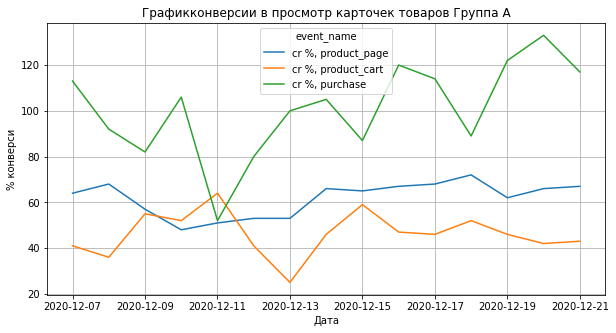

In [87]:
# выборка участников группы A
conversion_table_events_A.drop(['login','product_cart','product_page','purchase'],axis = 1).plot(grid=True, figsize=(10, 5))
plt.ylabel('% конверси')
plt.xlabel('Дата')
plt.title('Графикконверсии в просмотр карточек товаров Группа A')
plt.show()

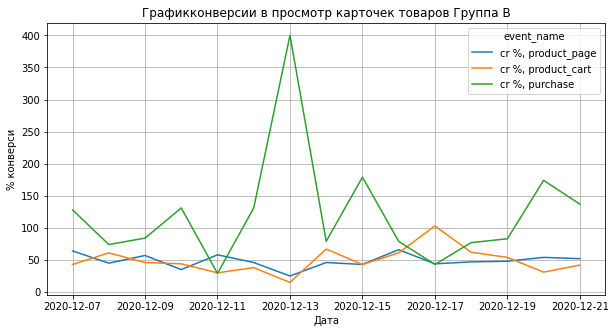

In [88]:
# выборка участников группы B
conversion_table_events_B.drop(['login','product_cart','product_page','purchase'],axis = 1).plot(grid=True, figsize=(10, 5))
plt.ylabel('% конверси')
plt.xlabel('Дата')
plt.title('Графикконверсии в просмотр карточек товаров Группа B')
plt.show()

    мы видим что график конверсии по карточкам Purchase выше в % соотношения у группы B  чем у группы B. Хороший знак что конверсия по карточки Покупки имеет самые высокое показатели , это озночает что клиенты склонены делать покукпки , особенно после внедрения рекамендационной системы.

    теперь посмотрим как выглядит графики с абсолютными значенями. 

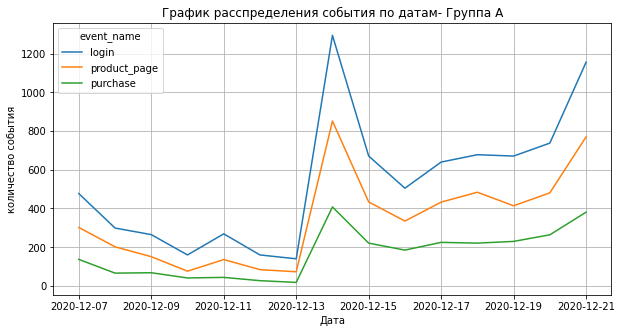

In [89]:
# выборка участников группы A
conversion_table_events_A.drop(['cr %, product_page','product_cart','cr %, product_cart','cr %, purchase'],axis = 1).plot(grid=True, figsize=(10, 5))
plt.ylabel('количество события')
plt.xlabel('Дата')
plt.title('График расспределения события по датам- Группа А')
plt.show()

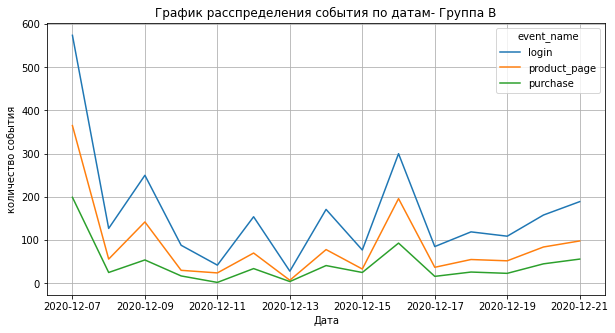

In [90]:
# выборка участников группы B
conversion_table_events_B.drop(['cr %, product_page','product_cart','cr %, product_cart','cr %, purchase'],axis = 1).plot(grid=True, figsize=(10, 5))
plt.ylabel('количество события')
plt.xlabel('Дата')
plt.title('График расспределения события по датам- Группа B')
plt.show()

    мы видим что участники группы А активнее чем участники группы B, имею ввиду что события в группе А намного больше чем у группы B, особенно рост идет после 13.декабря 2020 года. При этом, нужно взять в расчет что и участники группы А в количестве на четверть больше чем в группе B.

### Время проведения теста. Убедитесь, что оно не совпадает с маркетинговыми и другими активностями.

    Тест начинается 2020-12-07 и заканчивается 2021-01-04, последние доступниые данные 2020-12-30. Этот период не совподает с  маркетинговых активностями.

In [91]:
ab_project_marketing_events[np.logical_and(ab_project_marketing_events['start_dt'] >= dt.date(2020,12,7), ab_project_marketing_events['finish_dt'] <= dt.date(2020,12,21))]

,name,regions,start_dt,finish_dt


<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

<b>На доработку🤔:</b>
    
Если взглянуть на таблицу, то мы увидем событие    

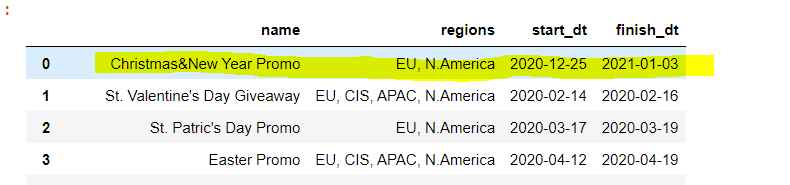
    
Оно пересекается с нашим экспериментом. Стоит пересмотреть алгоритм    

In [92]:
ab_project_marketing_events

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11


<div class="alert alert-info"> <b>Комментарий студента:</b> 

я понял вас, алгоритм я изменил ниже но мой вывод остоется прежнем. 

*Техническое задание*
    
Дата запуска теста: 2020-12-07;

Ожидаемый эффект: за 14 дней с момента регистрации в системе пользователи покажут улучшение каждой метрики не менее, чем на 10%. тоесть 2020.12.21

получается что события "Christmas&New Year Promo" Не влеяет на улучшения метрики, беря в расчет запрос технической задание 
    
 </div>

In [93]:
ab_project_marketing_events[np.logical_and(ab_project_marketing_events['start_dt'] >= dt.date(2020,12,7), ab_project_marketing_events['finish_dt'] <= dt.date(2021,1,4))]

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03


<div class="alert alert-warning">
<h2> Комментарий ревьюера <font color= "black"> V2</font> <a class="tocSkip"> </h2>

<b>Некоторые замечания и рекомендации💡:</b> 
    
Ты не совсем верно интерпретировал срок ожидаемого эффекта. 14 дней считается с момента регистрации пользователя, а не с момента запуска эксперимента. Поэтому у каждого пользователя будет индивидуальный интервал
    
А значит маркетинговое событие пересекается с экспериментом, как итог может повлиять на тест

### Аудиторию теста. Удостоверьтесь, что нет пересечений с конкурирующим тестом и нет пользователей, участвующих в двух группах теста одновременно. Проверьте равномерность распределения пользователей по тестовым группам и правильность их формирования.

In [94]:
recommender_system_test_table

,user_id,group,ab_test,date,region,device,event_dt,event_name,details
0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07,purchase,99.99
1,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-25,purchase,4.99
2,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07,product_cart,0.00
3,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-25,product_cart,0.00
4,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07,product_page,0.00
...,...,...,...,...,...,...,...,...,...
26285,80712ED4EA1B52A5,A,recommender_system_test,2020-12-14,EU,Android,2020-12-15,product_page,0.00
26286,80712ED4EA1B52A5,A,recommender_system_test,2020-12-14,EU,Android,2020-12-20,product_page,0.00
26287,80712ED4EA1B52A5,A,recommender_system_test,2020-12-14,EU,Android,2020-12-14,login,0.00
26288,80712ED4EA1B52A5,A,recommender_system_test,2020-12-14,EU,Android,2020-12-15,login,0.00


In [95]:
recommender_system_test_table.groupby('group').agg({'user_id':'nunique'})

,user_id
group,
A,3634
B,2717


In [96]:
recommender_system_test_table.groupby('group').agg({'user_id':'nunique'}).loc['B','user_id']/ \
recommender_system_test_table.groupby('group').agg({'user_id':'nunique'}).loc['A','user_id']

0.7476609796367639

In [97]:
recommender_system_test_table.groupby('group').agg({'user_id':'nunique'}).loc['B','user_id']- \
recommender_system_test_table.groupby('group').agg({'user_id':'nunique'}).loc['A','user_id']

-917

In [98]:
len(recommender_system_test_table['user_id'].unique())

6351

    Пользователи не расспределены равномерно по тестовым группам А/B, разница очень больша: в группе B пользователей на 25% меньше чем в группе А, на 917 пользователей.

In [99]:
group_A = recommender_system_test_table[recommender_system_test_table['group'] == "A"]

In [100]:
group_B = recommender_system_test_table[recommender_system_test_table['group'] == "B"]

In [101]:
for i in group_A['user_id']:
    if i in group_B['user_id']:
        print(i)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
    
    
Это проверка показывает, что нет пересечений между группами в целевом тесте    

    удостоверился что нет пересечений с конкурирующим тестом и нет пользователей, участвующих в двух группах теста одновременно. 

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

<b>На доработку🤔:</b>
    
Все расчеты проводятся по таблице `recommender_system_test_table`. В ней нет информации о пользователях из смежного теста
    
Пожалуйста, выполни проверку по пересечению со смежным тестом    

<div class="alert alert-info"> <b>Комментарий студента:</b> 

спасибо ! не очень понял почему нам это нужно. 
    
вы наверно имеете ввиду участники "recommender_system_test" И "interface_eu_test",

делаю ниже:
    
 </div>

In [ ]:
for i in final_ab_participants[final_ab_participants['ab_test'] == 'recommender_system_test']['user_id']:
    if i in final_ab_participants[final_ab_participants['ab_test'] == 'interface_eu_test']['user_id']:
        print(i)

     нет пересечений с конкурирующим тестом и нет пользователей, участвующих в двух группах теста одновременно.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <font color= "black"> V2</font><a class="tocSkip"></h2>

<b>На доработку🤔:</b>
    
На этом шаге становится понятно, что твой алгоритм работает не так. Потому что существуют пользователи с перечением по тестам.
    
Почему твой алгоритм не работает описано здесь 
    
https://stackoverflow.com/questions/49393053/using-in-operator-with-pandas-series
    
Чтобы исправить алгоритм стоит отказаться от использования оператора `in`
    
Предлагаю вовсе отказаться от цикла `for` и придумать более `pandas` решение. Возможно, тебе может вот это 
    
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.isin.html    
    
Как итог, пожалуйста, переделай эти алгоритмы    
    
    for i in group_A['user_id']:
    if i in group_B['user_id']:
        print(i)
    
    for i in final_ab_participants[final_ab_participants['ab_test'] == 'recommender_system_test']['user_id']:
    if i in final_ab_participants[final_ab_participants['ab_test'] == 'interface_eu_test']['user_id']:
        print(i)

<div class="alert alert-info"> <b>Комментарий студента V2:</b> 

спасибо! что-то я забыо про df.isin() и подумал что in работает похоже... 
скоректировал ниже:

 </div>

In [ ]:
final_ab_participants[final_ab_participants['ab_test'] == 'recommender_system_test']['user_id'].isin(final_ab_participants[final_ab_participants['ab_test'] == 'interface_eu_test']['user_id']).sum()

нашел 1602 пользователей участвующих в двух группах теста одновременно

<div class="alert alert-success">
<h2> Комментарий ревьюера <font color= "black"> V3</font> <a class="tocSkip"> </h2>
<b>Все отлично!👍 :</b> 
   
Как итог мы имеем влияние смежного теста на наш. Это очередное нарушение    

# 3) Исследовательский анализ данных

### Количество событий на пользователя одинаково распределены в выборках?

    Изначальное или по табличке "final_ab_participants" расспределения клиентов по выборкам выглядит следуйщим образом:

In [ ]:
    
    ax = sns.barplot(x = 'group', y = final_ab_participants.groupby('group')['user_id'].count().reset_index()['user_id'], data = final_ab_participants.groupby('group')['user_id'].count().reset_index().sort_values('user_id', ascending= False), ci = False)
    plt.xlabel("Группы A/B")
    plt.ylabel(' количество участников')
    ax.set_title("соотношение  признака {} по количеству клиентов".format('group'))
    ax.figure.set_size_inches(5,5)
    plt.legend
    plt.show()

In [ ]:

    ax = sns.countplot(data=final_ab_participants, x = 'ab_test', hue='group')
    ax.set_title("Название теста")
    ax.set_ylabel(' количество участников')
    plt.legend()
    plt.legend
    plt.show()

    но по технической задании нам нужно выбирать тест 'recommender_system_test' и участники с региона EU из общего датасета.

In [ ]:
# фильтрованая табличка в соотвествие с техничиской задание.
recommender_system_test_table

In [ ]:
# один участник может совершить множество событии
recommender_system_test_table[recommender_system_test_table['user_id'] == 'D1ABA3E2887B6A73']

In [ ]:
recommender_system_test_table.groupby('group').agg({'user_id':'count'})

    Большая разница в количество событий расспределены на пользователя

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
<b>Все отлично!👍:</b> 
    
Верное наблюдение    

In [ ]:
recommender_system_test_table[recommender_system_test_table['event_name']!= 'no_info' ].groupby('event_name').agg({'user_id':'count'}).sort_values('user_id', ascending = False)

In [ ]:
recommender_system_test_table.groupby(['event_name','group'])['user_id'].count().reset_index()

In [ ]:

    ax = sns.countplot(data=recommender_system_test_table[recommender_system_test_table['event_name'] != 'no_info'], x = 'event_name', hue='group')
    ax.set_title("соотношение  карточки воронки по количеству события")
    ax.set_ylabel('каличество')
    ax.figure.set_size_inches(10,10)
    plt.xticks(rotation=60)
    plt.legend()
    plt.legend
    plt.show()

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
<b>Все отлично!👍:</b> 
    
С таким графиком твоим коллегам будет удобно работать

    мы видим что события по карточкам воронки не расспределены равномерно по выборкам A/B для проведения теста. Слишкам большая разница между воронок А/B, местами количество события в выборке B 2, 3 раза меньше чем в выборке A.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
<b>Все отлично!👍:</b> 
    
Верные наблюдения

### Как число событий в выборках распределено по дням?

    Для анализа, строю Табличку и график событий в выборках распределено по дням

In [ ]:
# Табличка событий в выборках распределено по дням

recommender_system_test_table.pivot_table(index = 'date', 
                                            columns = 'event_name',
                                            values = 'user_id',
                                            aggfunc = 'count').drop('no_info',axis =1)

In [ ]:
recommender_system_test_table

In [ ]:

    ax = sns.countplot(data=recommender_system_test_table[recommender_system_test_table['event_name'] != 'no_info'].sort_values('date', ascending = True), x = 'date', hue ='event_name')
    ax.set_title("соотношение  признака по количеству клиентов")
    ax.set_ylabel('каличество')
    ax.figure.set_size_inches(15,15)
    plt.xticks(rotation=60)
    plt.legend()
    plt.legend
    plt.show()

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

<b>На доработку🤔:</b>
    
Стоит добавить наблюдение, что можно сказать по этому графику    

<div class="alert alert-info"> <b>Комментарий студента:</b> 

Коментарии: 

График показывает динамику взаимодействия  пользователей с карточками воронки. Мы видим что сохроняется иерархия воронки с событиями по карточкам. Мы видим что первая неделя с момента начала анализя, события по всем карточек на много меньше чем после 14 декабря. После 14 декабря мы наблюдаем заментый рост по каличесво событии по картычкам и тенденция к росту в конец периода.
    
 </div>

In [ ]:
recommender_system_test_table[recommender_system_test_table['event_name'] != 'no_info']

### Как меняется конверсия в воронке в выборках на разных этапах?

In [ ]:
#общая табличка конверсии
conversion_table_events

    разделяю датасет на две части, в соответсвия с двумя выборками A /B 

In [ ]:
group_A = recommender_system_test_table[recommender_system_test_table['group'] == 'A']

In [ ]:
group_B = recommender_system_test_table[recommender_system_test_table['group'] == 'B']

In [ ]:
conversion_table_events_A = group_A.pivot_table(index = 'date', 
                                                                    columns = 'event_name',
                                                                    values = 'user_id',
                                                                   aggfunc = 'count').drop('no_info',axis =1)

In [ ]:
conversion_table_events_B = group_B.pivot_table(index = 'date', 
                                                                    columns = 'event_name',
                                                                    values = 'user_id',
                                                                   aggfunc = 'count').drop('no_info',axis =1)

In [ ]:
# Общая татабличка ао двумя групп A/B
conversion_table_events

    посчитаю конверсии для всех карточек воронки для групп A/B

In [ ]:
conversion_table_events_A['cr %, product_page'] = np.ceil(conversion_table_events_A['product_page'] / conversion_table_events_A['login'] *100)

In [ ]:
conversion_table_events_A['cr %, product_cart'] = np.ceil(conversion_table_events_A['product_cart'] / conversion_table_events_A['product_page'] *100)

In [ ]:
conversion_table_events_A['cr %, purchase'] = np.ceil(conversion_table_events_A['purchase'] / conversion_table_events_A['product_cart'] *100)

In [ ]:
conversion_table_events_B['cr %, product_page'] = np.ceil(conversion_table_events_B['product_page'] / conversion_table_events_B['login'] *100)

In [ ]:
conversion_table_events_B['cr %, product_cart'] = np.ceil(conversion_table_events_B['product_cart'] / conversion_table_events_B['product_page'] *100)

In [ ]:
conversion_table_events_B['cr %, purchase'] = np.ceil(conversion_table_events_B['purchase'] / conversion_table_events_B['product_cart'] *100)

In [ ]:
conversion_table_events_A

In [ ]:
conversion_table_events_B

    Строю графики динамики метрк конверсии по карточкам воронки по грппам A и B 

In [ ]:
# выборка участников группы A
conversion_table_events_A.drop(['login','product_cart','product_page','purchase'],axis = 1).plot(grid=True, figsize=(10, 5))
plt.ylabel('% конверси')
plt.xlabel('Дата')
plt.title('Графикконверсии в просмотр карточек товаров Группа A')
plt.show()

In [ ]:
# выборка участников группы B
conversion_table_events_B.drop(['login','product_cart','product_page','purchase'],axis = 1).plot(grid=True, figsize=(10, 5))
plt.ylabel('% конверси')
plt.xlabel('Дата')
plt.title('Графикконверсии в просмотр карточек товаров Группа B')
plt.show()

In [ ]:
# Общая выборка участников группы 
conversion_table_events.drop(['login','product_cart','product_page','purchase'],axis = 1).plot(grid=True, figsize=(10, 5))
plt.ylabel('конверсии в просмотр карточек товаров Группа A/B')
plt.xlabel('Дата')
plt.title('Изменения метрик во времени')
plt.show()

    мы видим что график конверсии по карточкам Purchase выше в % соотношения у группы B  чем у группы B. Хороший знак что конверсия по карточки Покупки имеет самые высокое показатели , это озночает что клиенты склонены делать покукпки , особенно после внедоения рекамендационной системы.

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b>
    
Важное замечание. Однако, стоит понимать, что мы рассматриваем конверсию не из общего числа пользователей, а из предыдущего шага. 
    

    теперь посмотрим как выглядит графики с абсолютными значенями. 

In [ ]:
# выборка участников группы A
conversion_table_events_A.drop(['cr %, product_page','product_cart','cr %, product_cart','cr %, purchase'],axis = 1).plot(grid=True, figsize=(10, 5))
plt.ylabel('количество события')
plt.xlabel('Дата')
plt.title('График расспределения события по датам- Группа А')
plt.show()

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

<b>На доработку🤔:</b>
    
Название графика не соответствует коду    
    
Подпись по оси `y` говорит о том, что у нас конверсия 1200%, что не соответсвуте действительности
    
Пожалуйста, пересмотри подпись или пересмотри алгоритм построения графика   
    
Актуально для графика ниже    

<div class="alert alert-info"> <b>Комментарий студента:</b> 

спасибо! поменял названия на новые
    
 </div>

In [ ]:
# выборка участников группы B
conversion_table_events_B.drop(['cr %, product_page','product_cart','cr %, product_cart','cr %, purchase'],axis = 1).plot(grid=True, figsize=(10, 5))
plt.ylabel('количество события')
plt.xlabel('Дата')
plt.title('График расспределения события по датам- Группа B')
plt.show()

    мы видим что участники группы А активнее чем участники группы B, имею ввиду что события в группе А намного больше чем у группы B, особенно рост идет после 13.декабря 2020 года. При этом, нужно взять в расчет что и участники группы А в количестве на четверть больше чем в группе B.

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b>
    
Вывод стоит пересмотреть после исправления замечаний

<div class="alert alert-info"> <b>Комментарий студента:</b> 

спасибо! поменял комментарии выше.
    
 </div>

### Какие особенности данных нужно учесть, прежде чем приступать к A/B-тестированию?

    нужно проверять критерии успешного A/A-теста:
    
- Количество пользователей в различных группах различается не более, чем на 1%; - у нас большое различия
- Для всех групп фиксируют и отправляют в системы аналитики данные об одном и том же;
- Различие ключевых метрик по группам не превышает 1% и не имеет статистической значимости; - у нас большое различия
- Попавший в одну из групп посетитель остаётся в этой группе до конца теста. - проверил, все в порядке.

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Некоторые замечания и рекомендации💡:</b> 
    
С учетом исправлений вывод стоит пересмотреть
    
    
Будет здорово, если опишешь подробнее что означает пункт
    
    Различие ключевых метрик по группам не превышает 1% и не имеет статистической значимости; - у нас большое различия

<div class="alert alert-info"> <b>Комментарий студента:</b> 

я не пишу ввыводы выше, а особенности данных нужно учесть, прежде чем приступать к A/B-тестированию

Будет здорово, если опишешь подробнее что означает пункт: "Различие ключевых метрик по группам не превышает 1% и не имеет статистической значимость"
    
различия не имеет статистической значимости, это когда различия не превышает назначенного alpha.
    

 </div>

<div class="alert alert-success">
<h2> Комментарий ревьюера <font color= "black"> V2</font> <a class="tocSkip"> </h2>
<b>Все отлично!👍 :</b> 
    
Теперь я понял, спасибо. Однако, это правило используют не для проверки различий в метриках. А для оценки вероятности отклонить правильную гипотезу
    
Предлагаю такую формулировку
    
    Уровень значимости не превосходит 5%, что говорит о статистически значимых различиях между выборками

#  Проведу статический анализ

    A/B test: проверию гепотизы
    *Проверю гипотезу различия метрики до и после 14 дней с момента регистрации в системе пользователи
    - конверсии в просмотр карточек товаров — событие product_page
    - просмотры корзины — product_cart
     - покупки — purchase
- напишу промежуточныe выводы

### *Проверю гипотезу различия метрики до и 14 дней с момента регистрации в системе пользователи

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <font color= "black"> V2</font><a class="tocSkip"></h2>

<b>На доработку🤔:</b>
    
Две ячейки выше проблемные. Из-за них появлется предупреждение

<div class="alert alert-info"> <b>Комментарий студента:</b> 

спасибо! удалил и заменил в ручную. а как вы их нашли?
    
Я хочу знать как в другой раз мне их заменить  правильно, спасибо !
    
 </div>

<div class="alert alert-success">
<h2> Комментарий ревьюера <font color= "black"> V3</font> <a class="tocSkip"> </h2>
<b>Все отлично!👍 :</b> 
   
В предупреждении содержится текст ячейки `source`. Однако, так как он на русском языке, то весь текст выводится в формате unicode
    
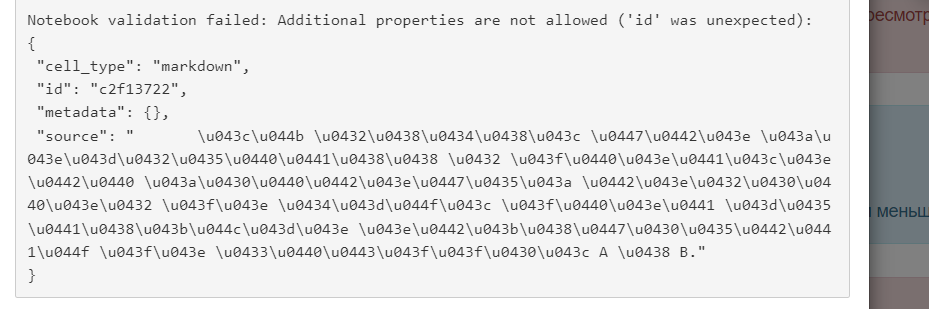
    
Чтобы определить ячейку, копируем текст ячейки в конвертор 
    
    https://dencode.com/
    
так мы поймем о какой ячейке идет речь    

In [ ]:
recommender_system_test_table.head()

In [ ]:
conversion_table_events_A

In [ ]:
conversion_table_events_B

#### Различия метрики конверсии в просмотр карточек товаров — событие product_page

     - Различия метрики конверсии в просмотр карточек товаров — событие product_page: проверяю различия конверсии в просмотр карточек товаров клиентами категории групп A/B
     Гипотеза: Различия по конверсии в просмотр карточек товаров участников  группы А и группы B совподает!

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

<b>На доработку🤔:</b>
    
Всегда стоит формулировать две гипотезы. Нулевую и альтернативную. Сейчас присутствует только нулевая

<div class="alert alert-info"> <b>Комментарий студента:</b> 

- Нулевая гипотеза: Различия по конверсии в просмотр карточек товаров участников  группы А и группы B совподает!
- Алтернативня гипотеза: Различия по конверсии в просмотр карточек товаров участников  группы А и группы B различаются!    

 </div>

<div class="alert alert-success">
<h2> Комментарий ревьюера <font color= "black"> V2</font> <a class="tocSkip"> </h2>
<b>Все отлично!👍 :</b> 
    
Верно сформулированы гипотезы

Ниже разделю изначальный датасэт на две таблички: по группам теста A/B 

In [ ]:
cr_product_page_A = conversion_table_events_A['cr %, product_page']

In [ ]:
cr_product_page_B = conversion_table_events_B['cr %, product_page']

In [ ]:
cr_product_page_A

In [ ]:
cr_product_page_B

In [ ]:
print(np.percentile(cr_product_page_A, [90, 95, 99])) 

In [ ]:
print(np.percentile(cr_product_page_B, [90, 95, 99])) 

In [ ]:
cr_product_page_A.mean()

In [ ]:
cr_product_page_B.mean()

       мы видим что конверсии в просмотр карточек товаров по дням прос не сильно отличается по группам A и B.

<div class="alert alert-success">
<h2> Комментарий ревьюера <font color= "black"> V3</font> <a class="tocSkip"> </h2>
<b>Все отлично!👍 :</b> 
   
Это тоже проблемная ячейка, исправил ее 

    Проверка гипотезы о равенстве долей

Группы: А (контрольная), B (новая платёжная воронка)

In [ ]:
alpha = 0.05 # критический уровень статистической значимости

In [ ]:
print(stats.mannwhitneyu(conversion_table_events_B['cr %, product_page'], conversion_table_events_A['cr %, product_page'])[1])
print('{0:.3f}'.format(conversion_table_events_B['cr %, product_page'].mean()/conversion_table_events_A['cr %, product_page'].mean()-1)) 

In [ ]:
p_value_cr = stats.mannwhitneyu(conversion_table_events_B['cr %, product_page'], conversion_table_events_A['cr %, product_page'])[1]

In [ ]:
if p_value_cr < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')

    Есть статистически значимое различие по конверсии между группами A/B

    Однако есть относительный проигрыш группы B равен 21%, конверсия в просмотр карточек товаров пользователей из группы B хуже чем у группы A.

    Исходя из обнаруженных фактов, тест следует остановить и признать его неуспешным. Продолжать смысла нет, потому как вероятность, что при имеющихся данных сегмент B на самом деле хуже сегмента A — очень высокая.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
<b>Все отлично!👍:</b> 
    
Верное замечание, что эксперимент стоит признать провальным. Однако, стоит понимать, что качество эксперимента не позволяет истинно оценить значимость проверяемого изменения
    
Наличие большого количества нарушений может сильно повлиять на итоговый результат так, что положительное изменение покажет отрицательный результат    

-   Гипотеза: Различия по конверсии в просмотр карточек товаров участников  группы А и группы B совподает!

In [ ]:
results = stats.ttest_ind(conversion_table_events_B['cr %, product_page'], conversion_table_events_A['cr %, product_page'], equal_var=False)

In [ ]:
print('p-значение:', results.pvalue)

In [ ]:
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

- мы видим что p_alue меньше aplha 0.05, то что озночает что конверсия в просмотр карточек товаров между пользоваиелей группы A и пользоваиелей группы B - может отлечятся! , значения не попадает в критическую зону. 
Полученное значение p-value говорит о том, что события когда конверсия в просмотр карточек товаров между пользоваиелей группы A и пользоваиелей группы B совподали является очень маловероятным.

#### Различия метрикик просмотры корзины — product_cart

     - Различия метрики кпросмотры корзин: проверяю различия просмотры корзины между клиентами категории групп A/B
     Нулевая Гипотеза: Различия по метрикик просмотры корзины участников группы А и группы B совподает!
     Алтернативная Гипотеза: Различия по метрикик просмотры корзины участников группы А и группы B различается!

In [ ]:
conversion_table_events_A['product_cart']

In [ ]:
conversion_table_events_B['product_cart']

In [ ]:
print(np.percentile(conversion_table_events_A['product_cart'], [90, 95, 99])) 

In [ ]:
print(np.percentile(conversion_table_events_B['product_cart'], [90, 95, 99])) 

In [ ]:
conversion_table_events_B['product_cart'].mean()

In [ ]:
conversion_table_events_A['product_cart'].mean()

    мы видим что средня по дням просмотров карточек корзин сильно отличается для пользователей группам A и B.

    Проверка гипотезы о равенстве долей

Группы: А (контрольная), B (новая платёжная воронка)

In [ ]:
alpha = 0.05 # критический уровень статистической значимости

In [ ]:
print(stats.mannwhitneyu(conversion_table_events_B['product_cart'], conversion_table_events_A['product_cart'])[1])
print('{0:.3f}'.format(conversion_table_events_B['product_cart'].mean()/conversion_table_events_A['product_cart'].mean()-1)) 

In [ ]:
p_value_product = stats.mannwhitneyu(conversion_table_events_B['product_cart'], conversion_table_events_A['product_cart'])[1]

In [ ]:
if p_value_product < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')

    Есть статистически значимое различие по посмотрам карточек корзины между группами A/B

    Однако есть относительный проигрыш группы B равен 73%, просмотры корзины пользователей из группы B хуже чем у группы A.

    Исходя из обнаруженных фактов, тест следует остановить и признать его успешным. Продолжать смысла нет, потому как вероятность, что при имеющихся данных сегмент B на самом деле хуже сегмента A — очень высокая.

 -   Гипотеза: Различия по метрикик просмотры корзины участников группы А и группы B совподает!

In [ ]:
results_product = stats.ttest_ind(conversion_table_events_B['product_cart'], conversion_table_events_A['product_cart'], equal_var=False)

In [ ]:
print('p-значение:', results_product.pvalue)

In [ ]:
if results_product.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

- мы видим что p_alue меньше aplha 0.05, то что озночает что количество событии просмотров корзины между пользоваиелей группы A и пользоваиелей группы B - может отлечятся!, значения не попадает в критическую зону. Полученное значение p-value говорит о том, что количество просмотров корзины по дням между пользоваиелей группы A и пользоваиелей группы B совподали - является очень маловероятным.

#### Различия метрикик покупки — purchase

     - Различия метрики покупки: проверяю различия покупки между клиентами категории групп A/B
     Нулевая Гипотеза: Различия по метрикик покупки участников группы А и группы B совподает!
     Алтернативная Гипотеза: Различия по метрикик покупки участников группы А и группы B различается!

In [ ]:
conversion_table_events_A['purchase']

In [ ]:
conversion_table_events_B['purchase']

In [ ]:
print(np.percentile(conversion_table_events_A['purchase'], [90, 95, 99])) 

In [ ]:
print(np.percentile(conversion_table_events_B['purchase'], [90, 95, 99])) 

In [ ]:
conversion_table_events_A['purchase'].mean()

In [ ]:
conversion_table_events_B['purchase'].mean()

    мы видим что средняя по карточек покукупок по дням сильно отличается для пользователей группам A и B.

    Проверка гипотезы о равенстве долей

Группы: А (контрольная), B (новая платёжная воронка)

In [ ]:
alpha = 0.05 # критический уровень статистической значимости

In [ ]:
print(stats.mannwhitneyu(conversion_table_events_B['purchase'], conversion_table_events_A['purchase'])[1])
print('{0:.3f}'.format(conversion_table_events_B['purchase'].mean()/conversion_table_events_A['purchase'].mean()-1)) 

In [ ]:
p_value_purchase = stats.mannwhitneyu(conversion_table_events_B['purchase'], conversion_table_events_A['purchase'])[1]

In [ ]:
if p_value_purchase < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')

    Есть статистически значимое различие по конверсии между группами A/B

    Однако есть относительный проигрыш группы B равен 74%, количество просмотров карточек покупков пользователей из группы B хуже чем у группы A.

    Исходя из обнаруженных фактов, тест следует остановить и признать его успешным. Продолжать смысла нет, потому как вероятность, что при имеющихся данных сегмент B на самом деле хуже сегмента A — очень высокая.

    Гипотеза: Различия по метрикик покупки участников группы А и группы B совподает!

In [ ]:
results_purchase = stats.ttest_ind(conversion_table_events_B['purchase'], conversion_table_events_A['purchase'], equal_var=False)

In [ ]:
print('p-значение:', results_purchase.pvalue)

In [ ]:
if results_purchase.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

- мы видим что p_alue меньше aplha 0.05, то что озночает что количество событии просмотр карточек покупок между пользоваиелей группы A и пользоваиелей группы B - может отлечятся!, значения не попадает в критическую зону. Полученное значение p-value говорит о том, что события когда конверсия что количество событии просмотр карточек покупок по дням между пользоваиелей группы A и пользоваиелей группы B совподали - является очень маловероятным.

    после проведения 3мя тестов по событиям карточек воронки мне стало интересно посмотреть динамику по выручки и различия между групкми по этлй метрике. потому что что чеки покупок могут быть разными каждого пользователя. 

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
<b>Все отлично!👍:</b> 
    
Верные выводы об отвержении гипотез

In [ ]:
recommender_system_test_table[recommender_system_test_table['event_name'] == 'purchase'].groupby('group').agg({'user_id':'nunique','details':'sum'})

In [ ]:
recommender_system_test_table_orders = recommender_system_test_table[recommender_system_test_table['event_name'] == 'purchase']

In [ ]:
recommender_system_test_table_orders

In [ ]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = recommender_system_test_table_orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина И выручки
visitorsAggregated = datesGroups.apply(
    lambda x: recommender_system_test_table_orders[np.logical_and(recommender_system_test_table_orders['date'] <= x['date'], recommender_system_test_table_orders['group'] == x['group'])]
    .agg({'date' : 'max', 'group' : 'max', 'user_id' : 'nunique', 'details' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitorsAggregated.columns = ['date', 'group', 'visitors', 'revenue']

print(visitorsAggregated.head(10)) 

In [ ]:
visitorsAggregated['order_sale'] = visitorsAggregated['revenue'] / visitorsAggregated['visitors']

In [ ]:
visitorsAggregated.head()

In [ ]:
visitorsAggregated_A = visitorsAggregated[visitorsAggregated['group'] == 'A']

In [ ]:
visitorsAggregated_B = visitorsAggregated[visitorsAggregated['group'] == 'B']

In [ ]:
plt.plot(visitorsAggregated_A['date'], visitorsAggregated_A['revenue'], label='A')
plt.plot(visitorsAggregated_B['date'], visitorsAggregated_B['revenue'], label='B')
plt.legend() 
plt.xlabel('Время')
plt.ylabel('сумма выручки')
plt.title('график кумулятивной выручки по группам')
plt.xticks(rotation = 45)
plt.show() 

In [ ]:
plt.plot(visitorsAggregated_A['date'], visitorsAggregated_A['order_sale'], label='A')
plt.plot(visitorsAggregated_B['date'], visitorsAggregated_B['order_sale'], label='B')
plt.legend() 
plt.xlabel('Время')
plt.ylabel('средний чек')
plt.title('график кумулятивного среднего чека по группам')
plt.xticks(rotation = 45)
plt.show() 

    общая картина такая:
    участники группы А больше покупают (события Purchase больше) и это логично, но мы видим что и средний чек у группы А выше, не смотря что средний чек покупак стремительно падает по двумя группам в течения периода анализа.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

<b>На доработку🤔:</b>
    
Стоит переименовать графики. Сейчас они называются одинаково, но визуализируют различные показатели
    
Также по графикам лидирует группа А. Стоит пересмотреть наблюдение
    
    участники группы B больше покупают

<div class="alert alert-info"> <b>Комментарий студента:</b> 

спасибо, поменял! 

 </div>

<div class="alert alert-success">
<h2> Комментарий ревьюера <font color= "black"> V2</font> <a class="tocSkip"> </h2>
<b>Все отлично!👍 :</b> 
    
В таком случае стоит переименовать ось У у превого графика

# Выводы и рекомендации

    - После проведения A/B тестов и  нулевую гипотезу, группа А проигрывает группе В по всем карточкам "product_page","product_cart","purchase". То-есть, каличество события по покупкам и просмотры корзины выборки A и B сильно Отличаются, а также и по конверсии арточек товаров. Метрики группе А показивают зночительгый выйграш. 
    - Единственное в чем группа B выгледет лучше чем группа B это по конверсии покупок но в тоже время по количесвтву проигпает группе B.
    - посмотрев с точки зрения выручки по дням, средний чек выборки А тоже выше.
    - соотвестенно можео утверждать что за 14 дней с момента регистрации в системе пользователи не показивают улучшение каждой метрики не менее, чем на 10%.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

<b>На доработку🤔:</b>
    
Вывод не соответствует анализу
    
Пожалуйста, пересмотри его
    

<div class="alert alert-info"> <b>Комментарий студента:</b> 
    
спасибо, согласен, что- то я уже запутался с группами, правильно ниже":

    - После проведения A/B тестов и нулевую гипотезу, группа B проигрывает группе A по всем карточкам "product_page","product_cart","purchase". То-есть, каличество события по покупкам и просмотры корзины выборки A и B сильно Отличаются, а также и по конверсии арточек товаров. Метрики группе А показивают зночительгый выйграш. 
    - Единственное в чем группа B выгледет лучше чем группа A - это по конверсии покупок, но в тоже время по количесвтву проигпает группе A.
    - посмотрев с точки зрения выручки по дням, средний чек выборки А тоже выше.
    - соотвестенно можно утверждать что за 14 дней с момента регистрации в системе пользователи не показивают улучшение каждой метрики не менее, чем на 10%. 

 </div>

<div class="alert alert-success">
<h2> Комментарий ревьюера <font color= "black"> V2</font> <a class="tocSkip"> </h2>
<b>Все отлично!👍 :</b> 
    
Теперь вывод соответствует анализу, молодец 🙂

### общее заключение о корректности проведения теста

    Я не могу сказать что все кондиции были соблюдены чтоьбы проввести A/B тест в безапасном режиме. Многие критерии успешного A/A-теста небыли соблюдены: 
     - Количество пользователей в различных группах различается более чем на 1%, на целых 25%
     - Различие ключевых метрик по группам не превышает 1% и не имеет статистической значимости, у нас сильные различия...

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

<b>На доработку🤔:</b>
   
Верное замечание о нарушениях правил проведения теста    
    
Данный пункт не соответствует анализу

    Различие ключевых метрик по группам не превышает 1% и не имеет статистической значимости, у нас сильные различия...

<div class="alert alert-info"> <b>Комментарий студента:</b> 
    
спасибо, скорректировал:

    Я не могу сказать что все кондиции были соблюдены чтоьбы провести A/B тест в безапасном режиме. Многие критерии успешного A/A-теста небыли соблюдены: 
     - Количество пользователей в различных группах различается более чем на 1%, на целых 25%
     - Различие ключевых метрик по группам не превышает 5% и не имеет статистической значимости, у нас сильные различия... 

 </div>

<div class="alert alert-success">
<h2> Комментарий ревьюера <font color= "black"> V2</font> <a class="tocSkip"> </h2>
<b>Все отлично!👍 :</b> 
       
Предлагаю такую формулировку
    
    Уровень значимости не превосходит 5%, что говорит о статистически значимых различиях между выборками

<div style="border:solid Chocolate 2px; padding: 40px">

**Общий вывод по проекту**


Корнел, спасибо за твой проект! Ты показал свои навыки, приложил много сил и довел проект до конца. Заметно, что ты действуешь по плану и соблюдаешь структуру, это здорово.

* Сейчас твой проект запускается с предупреждением, обычно такое бывает, когда копируешь проект из другой среды разработки. Стоит выяснить в чем причина и устранить ее
    
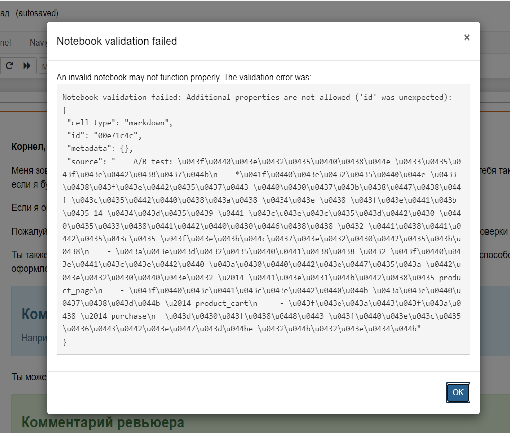
      
    
Если есть вопросы, задавай. Буду рад ответить на них🙋     

Есть несколько важных моментов, которые я отметил и которые можно было бы улучшить, подсказки ты найдешь в моих комментариях. 

**Отмечу отдельные положительные моменты проекта🙂**:
    
* Ты используешь все необходимые для предварительного анализа инструменты!
* Отличная структура проекта
* Ты активно используешь визуализацию, хорошо, что ты не избегаешь этого инструмента анализа
* Каждое важное действие ты аргументируешь
* В коде присутствуют комментарии    
* Верно проведена проверка гипотез  

**На что стоит обратить внимание🤓**:
    
* В проекте очень много опечаток, если собираешься выкладывать проект в портфолио, то обязательно стоит их устранить
 - 'извини за отпечатки, я начал писть на русском только во время этого Буткампа :) я очень страючь писать без ошибок, но даже если я сильно люблю русский язык, он мне не родной... я постораючь по максимум посмотреть и исправить'. спасибо!
* Итоговые выводы не соответствуют твоему анализу, пожалуйста, обрати на это внимание
* Оформление графиков
* В некоторых частях проекта выводы не соответствуют графикам и таблицам. Я оставил свои комментарии в таких частях
* Изменить порядок столбцов в таблице `conversion_table_events`    
* Пересмотреть алгоритм поиска пересечений с маркетинговыми событиями   
* Выполни проверку по пересечению со смежным тестом    
* Добавить формулировки альтернативных гипотез    
* Переписать и дополнить выводы где требуется
* Остальные рекомендации ты найдешь в моих комментариях!


**Желаю удачи и жду твой проект на повторное ревью!**😉

![gif](https://media.giphy.com/media/xT9IgEYXCNqPZnqMuY/giphy.gif)



<div class="alert alert-info"> <b>Комментарий студента:</b> 
    
спасибо за замечания  и советы !
    
не получилось исправить notebook validation  failed, появилось когда скапировал один график из другой тетрадке jupyter...

посмотрел по следуйщиму форуму, не нашел решение
    
https://splunktool.com/notebook-validation-failed-additional-properties-are-not-allowed-id-was-unexpected 

 </div>

<div class="alert alert-success">
<h2> Комментарий ревьюера <font color= "black"> V2</font> <a class="tocSkip"> </h2>
<b>Все отлично!👍 :</b> 
    
Пробелма не в одной ячейке. Я отметил проблемные ячейки. Предлагаю удалить их и создать новые вручную   

<div style="border:solid Chocolate 2px; padding: 40px">

**Общий вывод по проекту <font color= "black"> V2</font>** 
    
Корнел, спасибо за обратную связь, проверять твою работу было очень удобно🙏
    
* Ты молодец, на все ошибки обратил внимание. 

Выделим отдельно моменты для доработки    
    
* Доработать график `Стоимость покупки в долларах`
* Пересмотреть вывод по графику `Изменения метрик во времени`  
* Переделать алгоритмы поиска пересекающихся пользователей
* Переработать проблемные ячейки
* Остальные рекомендации оставил в комментариях 
     
    
**Жду твой проект на повторное ревью!**😉
    

<div style="border:solid Chocolate 2px; padding: 40px">

**Общий вывод по проекту <font color= "black"> V3</font>** 
    
Корнел, спасибо за обратную связь, проверять твою работу было очень удобно🙏
    
* Ты молодец, все ошибки исправлены.
    
Поздравляю с завершением этого проекта, надеюсь мои комментарии были полезны тебе 🥳
    
**Ты почти у своей цели**😉
    
![gif](https://media3.giphy.com/media/mJHSkWKziszrkcNJPo/giphy.gif?cid=ecf05e4751sqiwyupsnl7wcq220d4w5u5885lsimcajolzd2&rid=giphy.gif&ct=g)